In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

import import_ipynb

from functions_farside import generate_ps, muller_cal
from image_calculation_functions import *

importing Jupyter notebook from functions_farside.ipynb
importing Jupyter notebook from image_calculation_functions.ipynb


In [2]:
theta_p=181
phi_p=361
beam_squarel,ethetal, ephil=read_feko('dipole_0p1-1MHz_regolith-0',31,theta_p,phi_p)
beam_squarel90,ethetal90,ephil90=read_feko('dipole_0p1-1MHz_regolith-90',31,theta_p,phi_p)

beam_squareh,ethetah, ephih = read_feko('dipole_0p4-40MHz_regolith',10,theta_p,phi_p)
beam_squareh90,ethetah90,ephih90 = read_feko('dipole_0p4-40MHz_regolith-90',10,theta_p,phi_p)



In [3]:
x =0
H_o = np.linspace(0,90,1)*np.pi/180
de = np.array([30])*np.pi/180

In [10]:

sample = 2

if sample==0:
    wav = 500 #in m; f = 0.6 MHz
    index = 17
    beam_square,etheta, ephi = beam_squarel,ethetal, ephil
    beam_square90,etheta90,ephi90 = beam_squarel90,ethetal90,ephil90
elif sample==1:
    wav = 150 # in m; f = 2MHz
    index = 3
    beam_square,etheta, ephi = beam_squareh,ethetah, ephih
    beam_square90,etheta90,ephi90=beam_squareh90,ethetah90,ephih90
   
    
elif sample==2:
    
    wav = 30 # in m; f = 10MHz
    index = 4
    beam_square,etheta, ephi = beam_squareh,ethetah, ephih
    beam_square90,etheta90,ephi90=beam_squareh90,ethetah90,ephih90
f = 300/wav


####Normalizing by 2 MHz
#etheta = np.roll(etheta,180,axis=2)/np.max(ethetah[3,:,:])
#etheta90 = np.roll(etheta90,180,axis=2)/np.max(ethetah90[3,:,:])
#ephi = np.roll(ephi,180,axis=2)/np.max(ephih[3,:,:])
#ephi90 = np.roll(ephi90,180,axis=2)/np.max(ephih90[3,:,:])

del_ue,del_ve,del_we = uvcal(de,H_o[0],wav,50.5,50.5)
del_u,del_v,del_w = uvcal(de,H_o[0],wav,50,50)

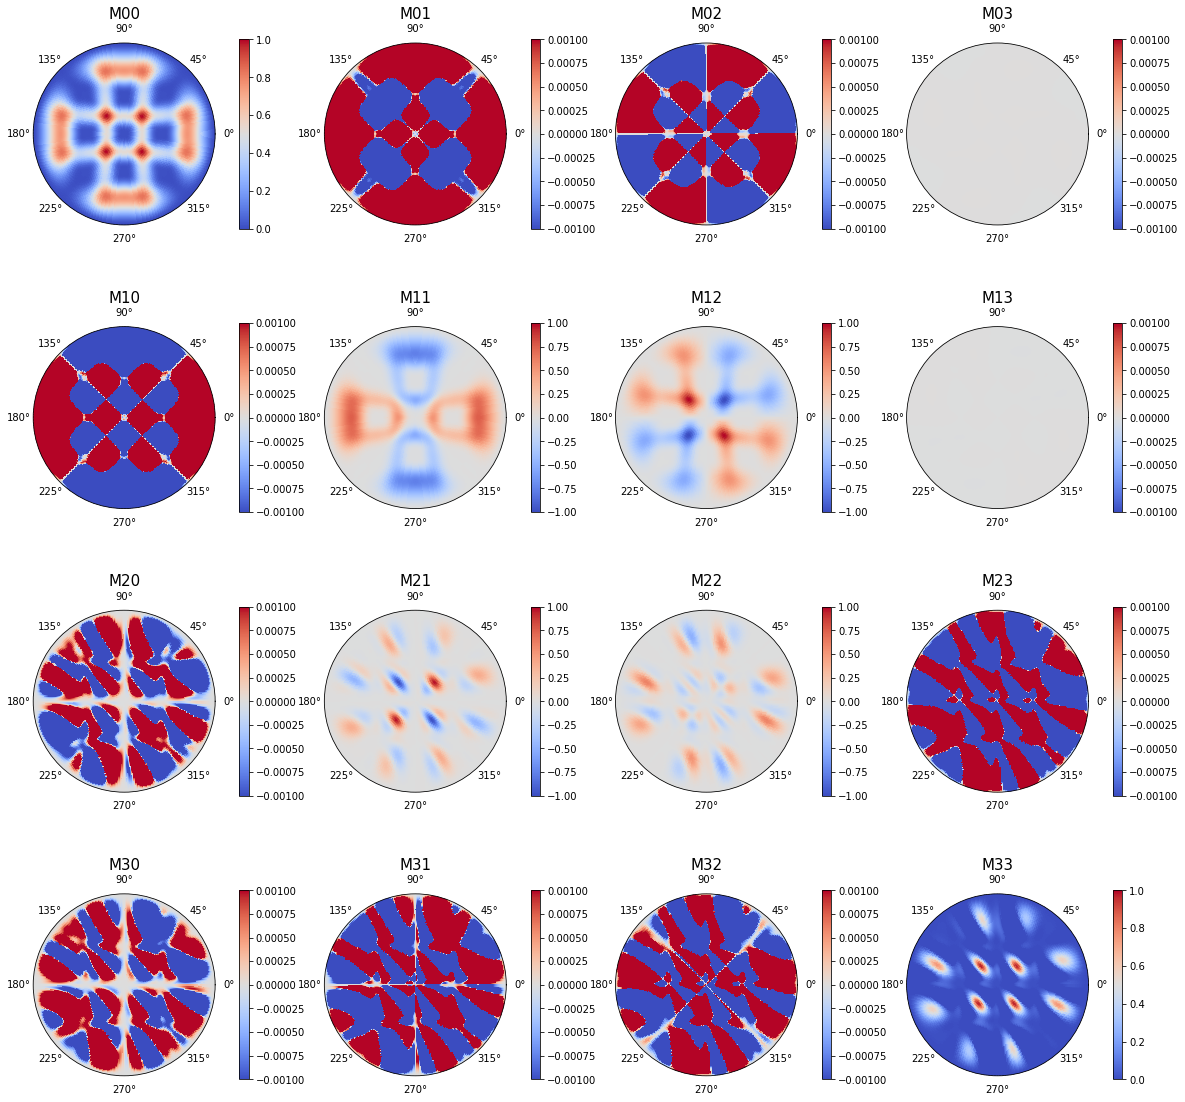

In [12]:
M_rego_wav1 = muller_cal(etheta[index,:,:],ephi[index,:,:],etheta90[index,:,:],ephi90[index,:,:],0,del_u,del_v,offset=1,title='Dipole100m_regolith_offset_10MHz')

In [123]:
np.save('Muller_dipoleonrego_wav1_nooffset',M_rego_wav1)

In [11]:
muller_cal(etheta_e[35:36,:,:],ephi_e[35:36,:,:],etheta_e90,ephi_e90,0,del_u2,del_v2,offset=1,title='edges_75MHz_offset_50m_'+str(f2)+'MHz')

NameError: name 'muller_cal' is not defined

In [249]:


M00be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M01be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M02be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M03be_r = np.zeros((len(etheta75[:,0])),dtype='complex')

M10be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M11be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M12be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M13be_r = np.zeros((len(etheta75[:,0])),dtype='complex')

M20be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M21be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M22be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M23be_r = np.zeros((len(etheta75[:,0])),dtype='complex')

M30be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M31be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M32be_r = np.zeros((len(etheta75[:,0])),dtype='complex')
M33be_r = np.zeros((len(etheta75[:,0])),dtype='complex')

for i in range(len(etheta75[:90,0])):
    M00be_r[i] = np.sqrt(np.nanmean(M00b[i,:]**2))
    M01be_r[i] = np.sqrt(np.nanmean(M01b[i,:]**2))
    M02be_r[i] = np.sqrt(np.nanmean(M02b[i,:]**2))
    M03be_r[i] = np.sqrt(np.nanmean(M03b[i,:]**2))
    
    M10be_r[i] = np.sqrt(np.nanmean(M10be[i,:]**2))
    M11be_r[i] = np.sqrt(np.nanmean(M11be[i,:]**2))
    M12be_r[i] = np.sqrt(np.nanmean(M12be[i,:]**2))
    M13be_r[i] = np.sqrt(np.nanmean(M13be[i,:]**2))
    
    M20be_r[i] = np.sqrt(np.nanmean(M20be[i,:]**2))
    M21be_r[i] = np.sqrt(np.nanmean(M21be[i,:]**2))
    M22be_r[i] = np.sqrt(np.nanmean(M22be[i,:]**2))
    M23be_r[i] = np.sqrt(np.nanmean(M23be[i,:]**2))

    M30be_r[i] = np.sqrt(np.nanmean(M30be[i,:]**2))
    M31be_r[i] = np.sqrt(np.nanmean(M31be[i,:]**2))
    M32be_r[i] = np.sqrt(np.nanmean(M32be[i,:]**2))
    M33be_r[i] = np.sqrt(np.nanmean(M33be[i,:]**2))


In [201]:
E_tt = etheta75* np.conjugate(etheta75)
E_pp = ephi75* np.conjugate(ephi75) 
E_pt = ephi75 * np.conjugate(etheta75)
E_tp = etheta75 * np.conjugate(ephi75)

I = np.real(E_tt + E_pp)
Q = np.real(E_tt - E_pp)
U = np.real(E_tp + E_pt)
V = np.real(-1j*(E_tp - E_pt))

In [41]:
E_ab = etheta75 * np.conjugate(etheta75_b) + ephi75 * np.conjugate(ephi75_b)
E_ba = etheta75_b * np.conjugate(etheta75) + ephi75_b * np.conjugate(ephi75)
E_aa = etheta75 * np.conjugate(etheta75) + ephi75 * np.conjugate(ephi75)
E_bb = etheta75_b * np.conjugate(etheta75_b) + ephi75_b * np.conjugate(ephi75_b)

I = (E_aa + E_bb)
Q = (E_aa - E_bb)
U = (E_ab + E_ba)
V = (-1j*E_ab + 1j*E_ba)